In [8]:
import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv('imdb.csv')
series = pd.read_csv('Shows.csv')

movies.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [9]:
series.head(2)

,Unnamed: 0,ID,Name,Year,Rating,Duration,Reviews,Director,Genre,Link
0,0,tt5491994,Planet Earth II,2016,9.5,4h 58m,139,David Attenborough|Chadden Hunter|Elizabeth White,Documentary,https://www.imdb.com/title/tt5491994/
1,1,tt0795176,Planet Earth,2006,9.4,8h 58m,100,David Attenborough|Sigourney Weaver|Nikolay Dr...,Documentary,https://www.imdb.com/title/tt0795176/


#### 1.1) Removing Columns

In [11]:
del movies['Poster_Link']
del movies['Certificate']
del movies['Overview']
del movies['Meta_score']
del movies['Star1']
del movies['Star2']
del movies['Star3']
del movies['Star4']
del movies['No_of_Votes']
del movies['Gross']

del series['Unnamed: 0']
del series['ID']
del series['Reviews']
del series['Link']

In [12]:
movies.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Frank Darabont
1,The Godfather,1972,175 min,"Crime, Drama",9.2,Francis Ford Coppola
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,Christopher Nolan
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,Francis Ford Coppola
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,Sidney Lumet


In [13]:
series.head()

,Name,Year,Rating,Duration,Director,Genre
0,Planet Earth II,2016,9.5,4h 58m,David Attenborough|Chadden Hunter|Elizabeth White,Documentary
1,Planet Earth,2006,9.4,8h 58m,David Attenborough|Sigourney Weaver|Nikolay Dr...,Documentary
2,Breaking Bad,2008,9.4,49m,Bryan Cranston|Aaron Paul|Anna Gunn,Crime|Drama|Thriller
3,Band of Brothers,2001,9.4,9h 54m,Scott Grimes|Damian Lewis|Ron Livingston,Drama|History|War
4,Chernobyl,2019,9.3,5h 30m,Jessie Buckley|Jared Harris|Stellan Skarsgård,Drama|History|Thriller


#### 1.2) Checking Null Values

In [14]:
movies.isnull().sum()

Series_Title     0
Released_Year    0
Runtime          0
Genre            0
IMDB_Rating      0
Director         0
dtype: int64

In [15]:
series.isnull().sum()

Name        0
Year        0
Rating      0
Duration    0
Director    0
Genre       0
dtype: int64

#### 1.4 Preprocessing Duration Column for Series

In [57]:
duration = []

for i in series['Duration']:
    
    if('h' in i and 'm' in i):
        duration.append((int(i.split(' ')[0][:-1]) * 60) + int(i.split(' ')[1][:-1]))
    
    elif ('h' in i and 'm' not in i):
        duration.append(int(i[:-1])*60)
        
    elif ('h' not in i and 'm' in i):
        duration.append(int(i[:-1]))
    else:
        duration.append(55)
        
series['Duration'] = duration

series.head()

,Name,Year,Rating,Duration,Director,Genre
0,Planet Earth II,2016,9.5,298,David Attenborough|Chadden Hunter|Elizabeth White,Documentary
1,Planet Earth,2006,9.4,538,David Attenborough|Sigourney Weaver|Nikolay Dr...,Documentary
2,Breaking Bad,2008,9.4,49,Bryan Cranston|Aaron Paul|Anna Gunn,Crime|Drama|Thriller
3,Band of Brothers,2001,9.4,594,Scott Grimes|Damian Lewis|Ron Livingston,Drama|History|War
4,Chernobyl,2019,9.3,330,Jessie Buckley|Jared Harris|Stellan Skarsgård,Drama|History|Thriller


#### 1.5 Preprocessing Duration Column for Movies

In [64]:
duration = []

for i in movies['Runtime']:
    
    duration.append(int(i.split(' ')[0]))
    
movies['Runtime'] = duration

movies.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont
1,The Godfather,1972,175,"Crime, Drama",9.2,Francis Ford Coppola
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,Christopher Nolan
3,The Godfather: Part II,1974,202,"Crime, Drama",9.0,Francis Ford Coppola
4,12 Angry Men,1957,96,"Crime, Drama",9.0,Sidney Lumet


#### 1.6 Preprocessing Director Column for Series

In [71]:
director = []

for i in series['Director']:
    director.append(i.replace('|',','))
    
series['Director'] = director
    
series.head()

,Name,Year,Rating,Duration,Director,Genre
0,Planet Earth II,2016,9.5,298,"David Attenborough,Chadden Hunter,Elizabeth White",Documentary
1,Planet Earth,2006,9.4,538,"David Attenborough,Sigourney Weaver,Nikolay Dr...",Documentary
2,Breaking Bad,2008,9.4,49,"Bryan Cranston,Aaron Paul,Anna Gunn",Crime|Drama|Thriller
3,Band of Brothers,2001,9.4,594,"Scott Grimes,Damian Lewis,Ron Livingston",Drama|History|War
4,Chernobyl,2019,9.3,330,"Jessie Buckley,Jared Harris,Stellan Skarsgård",Drama|History|Thriller


#### 1.7 Preprocessing Genre Column for Movies

In [81]:
genre = []

for i in movies['Genre']:
    genre.append(",".join([_.strip() for _ in i.split(',')]))
    
movies['Genre'] = genre

movies.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont
1,The Godfather,1972,175,"Crime,Drama",9.2,Francis Ford Coppola
2,The Dark Knight,2008,152,"Action,Crime,Drama",9.0,Christopher Nolan
3,The Godfather: Part II,1974,202,"Crime,Drama",9.0,Francis Ford Coppola
4,12 Angry Men,1957,96,"Crime,Drama",9.0,Sidney Lumet


#### 1.8 Preprocessing Genre Column for Series

In [84]:
genre = [i.replace('|',',') for i in series['Genre']]

series['Genre'] = genre

series.head()

,Name,Year,Rating,Duration,Director,Genre
0,Planet Earth II,2016,9.5,298,"David Attenborough,Chadden Hunter,Elizabeth White",Documentary
1,Planet Earth,2006,9.4,538,"David Attenborough,Sigourney Weaver,Nikolay Dr...",Documentary
2,Breaking Bad,2008,9.4,49,"Bryan Cranston,Aaron Paul,Anna Gunn","Crime,Drama,Thriller"
3,Band of Brothers,2001,9.4,594,"Scott Grimes,Damian Lewis,Ron Livingston","Drama,History,War"
4,Chernobyl,2019,9.3,330,"Jessie Buckley,Jared Harris,Stellan Skarsgård","Drama,History,Thriller"


#### 1.9 Combining the Dataset

In [106]:
# Name, Year, Duration, Genre, Rating , Director

data = []

for i in movies.values:
    data.append([i[0], i[1] ,i[2], i[3], i[4], i[5],'Movie'])
    
for i in series.values:
    data.append([i[0], i[1] ,i[3], i[5], i[2], i[4],'Series'])
    
df = pd.DataFrame(data, columns = ['name','year','duration','genre','rating','director','type'])

df.head()

,name,year,duration,genre,rating,director,type
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Movie
1,The Godfather,1972,175,"Crime,Drama",9.2,Francis Ford Coppola,Movie
2,The Dark Knight,2008,152,"Action,Crime,Drama",9.0,Christopher Nolan,Movie
3,The Godfather: Part II,1974,202,"Crime,Drama",9.0,Francis Ford Coppola,Movie
4,12 Angry Men,1957,96,"Crime,Drama",9.0,Sidney Lumet,Movie


#### 1.10 Saving the Dataset

In [107]:
df.to_csv('final.csv', index = False)

## 2. Data Analysis

#### 2.1) Finding All Genre

In [112]:
genre = []

for i in df['genre']:
    genre += i.split(',')
    
genre = list(set(genre))
    
print(genre)

['Action', 'Sci-Fi', 'Western', 'Reality-TV', 'Film-Noir', 'Documentary', 'Musical', 'Game-Show', 'Biography', 'Adventure', 'Comedy', 'Short', 'Thriller', 'History', 'Romance', 'Sport', 'Nan', 'Horror', 'Mystery', 'Fantasy', 'War', 'Music', 'Crime', 'News', 'Family', 'Talk-Show', 'Drama', 'Animation']


#### 2.2) Count No. of Shows Or Movies in Each Genre

In [120]:
data = []

for gen in genre:    
    c = 0
    for i in df['genre']:
        if(gen in i):
            c += 1
            
    data.append([gen, c])
    
df_ = pd.DataFrame(data, columns = ['genre','freq'])
df_.head()

,genre,freq
0,Action,244
1,Sci-Fi,73
2,Western,22
3,Reality-TV,3
4,Film-Noir,19


#### 2.3) Top 5 Genre in terms of number of Shows/Movies

In [124]:
df_.sort_values(by = 'freq', ascending = False).head()

,genre,freq
26,Drama,847
10,Comedy,304
22,Crime,261
0,Action,244
9,Adventure,242


#### 2.4) Gerne Distribution (Visualization)

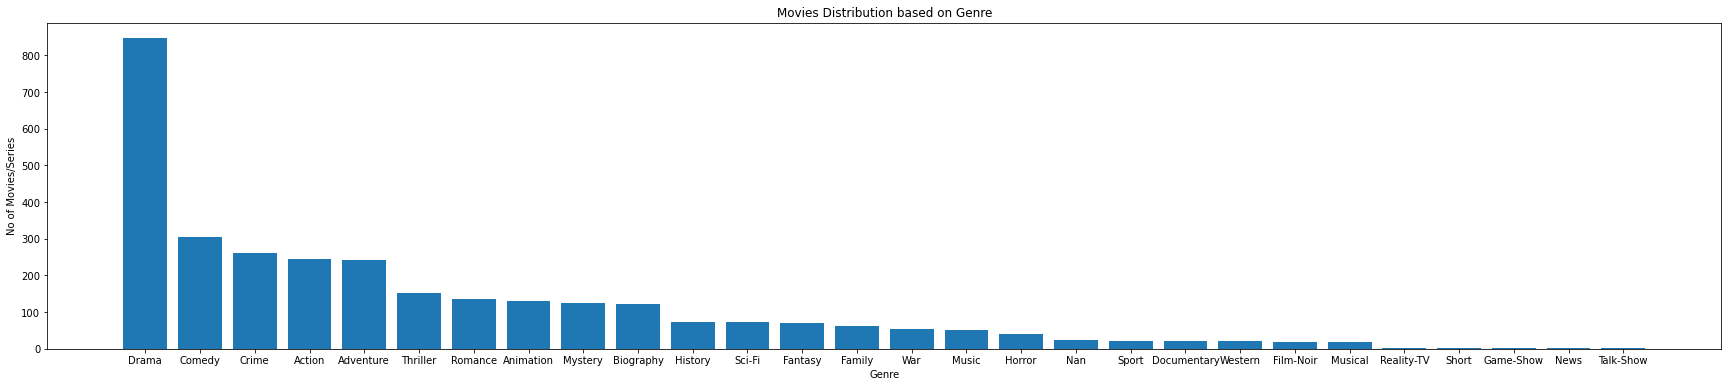

In [132]:
x = df_.sort_values(by = 'freq', ascending = False)['genre'].values
y = df_.sort_values(by = 'freq', ascending = False)['freq'].values

fig, ax = plt.subplots(figsize = (30,6))

ax.bar(x,y)

plt.title("Movies Distribution based on Genre")
plt.xlabel('Genre')
plt.ylabel('No of Movies/Series')

plt.show()

#### 2.5) Finding Number of Series/Movies Director by each Director

In [140]:
director = []

for i in df['director']:
    director += i.split(',')
    
director = list(set(director))

data = []
for j in director:    
    c = 0
    for i in df['director']:
        if(j in i):
            c += 1
            
    data.append([j, c])
    
df_ = pd.DataFrame(data, columns = ['director','freq'])
df_.head()

,director,freq
0,Ryan Stiles,1
1,Joel Schumacher,1
2,Zaza Urushadze,1
3,Naveen Kasturia,2
4,Nadine Labaki,1


#### 2.6) Top 20 Directors who made most number of Series/Movies

In [142]:
df_.sort_values(by = 'freq', ascending = False).head(20)

,director,freq
421,Alfred Hitchcock,15
228,Steven Spielberg,13
691,Hayao Miyazaki,11
436,Akira Kurosawa,10
201,Martin Scorsese,10
164,Woody Allen,9
162,Stanley Kubrick,9
639,Billy Wilder,9
142,David Fincher,8
495,Clint Eastwood,8
